# Libro: Machine Learning con Pytorch y Scikit-learn. De Sebastian Rashcka.

En este notebook iremos realizando apuntes de los capítulos 12,13 y 14, donde se centra en el uso de pytorch y la creación de redes neuronales. El capítulo 2 y el capítulo 11 sirven como una primera aproximación a que son las redes neuronales(más sencillas) y como se programan desde cero(sin uso de líbreriías)

## Capítulo 12: Introducción a Pytorch

Pytorch es una biblioteca de aprendizaje automático , que nos permite implementar redes neurinales de forma mucho más sencilla que con operaciones numpy por ejemplo, además de poder crear estructuras de redes complejas y personalizadas e incluso utilizar modelos ya creados y preentrenados como YOLO.

Está biblioteca nos permite:
*   Mejorar el rendimiento del entrenamiento de los modelos
*   Construir pipelines de entrada y permitir un entrenamiento eficiente de los datos(Dataset y DataLoader)
*   Escribir código de aprendizaje automatico optimizado
*   Implementar facilmente arquitecturas de redes neuronales con torch.nn

### 1. Mejorar rendimiento
Pytorch nos permite escribir código utilizando GPU de manera fácil, como si estuveiramos ejecutando código Python normal. La GPU es más potente ya que nos permite realizar múltiples calculos en coma flotante más por segundo que una CPU

Pytorch nos permite esta ejecución en CPU, GPU y dispositivos XLA como TPU, pero cuando mejor funciona es con la GPU, y como Pytorch soporta oficialmente las GPU con CUDA y ROCm, tiene mucha potencia.

Para ello estámn los tensores de Pytorch que son como los arrays de Numpy con la característica de que están optimizados para la diferenciación automatica y que sean ejecutados en las GPU! -> Trabajaremos con tensores!!
El desarrollo de Pytorch se basa en la biblioteca torch de Python!!

### 2. Manejo de tensores: Creación y manipulación

 Instalacion de Pytorch, lo recomendado es con soporte para GPU





In [ ]:
# pip install torch torchvision #normal sin cpu
!pip install torch torchvision -f https://download.pytorch.org/whl/torch_stable.html #lo ideal con GPU, se necesita una tajreta gráfica NVIDIA compatible con CUDA y cuDNN!!!

In [ ]:
import numpy as np
import torch
import torchvision
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import pathlib
import os
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from PIL import Image
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Creación de tensores

In [ ]:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b) # o torch.tensor(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


Tensores de 1 de forma dada

In [ ]:
t_ones = torch.ones(2, 3) #torch.zeros, torch.rand
t_ones.shape

torch.Size([2, 3])

Cambiar el tipo de un tensor

In [ ]:
print(t_a.dtype)
t_a=t_a.to(torch.int32)
t_a.dtype

torch.int64


torch.int32

Funciones para cambiar la dimension de un tensor

In [ ]:
t = torch.rand(3, 5)

t_tr = torch.transpose(t, 0, 1) #recibe tensor, dimension primera a ser transpuesta, segunda dimension a ser transpuesta
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


In [ ]:
t = torch.zeros(30)

t_reshape = t.reshape(5, 6)

print(t_reshape.shape)

torch.Size([5, 6])


In [ ]:
t = torch.zeros(1, 2, 1, 4, 1)

t_sqz = torch.squeeze(t) # elimina las dimensiones innecesarias, es decir las que tienen 1

print(t.shape, ' --> ', t_sqz.shape)

t_sqz2 = torch.unsqueeze(t_sqz,0) #añade una dimension en la posicion indicada

print(t_sqz.shape, ' --> ', t_sqz2.shape)


torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([2, 4])
torch.Size([2, 4])  -->  torch.Size([1, 2, 4])


Aplicación de operaciones mátematicas

In [ ]:
t1 = torch.tensor([[2,1,0],[3,4,5]]) #multiplicacion directa
print(t1.shape)
t2 = torch.tensor([[3,4,5],[2,1,0]])
print(t2.shape)
t3 = torch.multiply(t1,t2)
print(t3)
print(torch.matmul(t1,t2.reshape(3,2))) # multiplicacion de matrices, deben tener formas validas

torch.Size([2, 3])
torch.Size([2, 3])
tensor([[6, 4, 0],
        [6, 4, 0]])
tensor([[11, 10],
        [34, 20]])


In [ ]:
torch.mean(t1.to(torch.float64),axis=0) #media con respecto a las columnas

tensor([2.5000, 2.5000, 2.5000], dtype=torch.float64)

In [ ]:
torch.linalg.norm(t1.to(torch.float64),ord=2,dim=1) #la norma por filas, que es la dim y orden es a lo que se eleva, de 2 que sea la norma. raiz(suma(e^2))

tensor([2.2361, 7.0711], dtype=torch.float64)

Division y conca6tenacion de tensores

In [ ]:
t = torch.rand(6)

print(t)

t_splits = torch.chunk(t, 3) #divide en 3 un tensor

[item.numpy() for item in t_splits] #tensor a numpy-> t.numpy()

tensor([0.0132, 0.6888, 0.5602, 0.1793, 0.7895, 0.7760])


[array([0.01323944, 0.6887811 ], dtype=float32),
 array([0.5601929 , 0.17928219], dtype=float32),
 array([0.7895465, 0.7759582], dtype=float32)]

In [ ]:
A = torch.ones(3)
B = torch.zeros(2)

C = torch.cat([A, B], axis=0) #concatenacion
print(C)

tensor([1., 1., 1., 0., 0.])


In [ ]:
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack([A, B], axis=1) #concatenacion pero añadiendo como nueva columnas
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


### 3. Cargar datos con el módulo torch.utils.data, para iterar en conjuntoas de datos de manera eficiente. También veremos datos ya existentes y como usarlos con torch.utils.data.Dataset


### Elaboracion de pipelines

Cuando el conjunto de datos es pequeño podemos cargar los datos como un tensoir de la memoria y usar directamente ese tensor para el entrenamiento, pero en los casos tipicos con grandes datos donde la memoria no puede contenerlo, tendremos que cargar los datos desde el dispositivo de alamcenamiento principal lote a lote. También es posible que necesitemos construir un pipeline de procesamiento de datos para aplicar transformaciones y preprocesamiento a los dats como normalizacion, escalado, adicion de ruido, reshape de imagenes etc. Manualmente puede ser complicado, pero Pytorch proporcionada una clase para consturir estoss pipelines de manera efciente. Tambien vamos a ver las diferentes formas de crear un Dataset y DataLoader en Pytorch para implementar la carga de datos, la aleatorizacion y el preprocesamiento de los datos.

Crear lotes a partir de conjuntos de datos, por ejemplo supongamos que tenemos 6 muestras y queremos dividirlo en dos lotes de tamaño 3 cada uno.

In [ ]:
x = torch.arange(6,dtype=torch.float32)
data_loader = DataLoader(x,batch_size=3)
for i,batch in enumerate(data_loader,1):
  print(f'batch {i}: ', batch)

batch 1:  tensor([0., 1., 2.])
batch 2:  tensor([3., 4., 5.])


Supongamos ahora, que tenemos los datos en dos tensores distitnos, por ejemplo una primera matriz con las 4 muestras del dataset y las 3 variables predictoras y por otro lados las 4 etiquetas predictoras de ese dataset en otro tensor. Primero tenemos que unir todos los datos en un mismo dataset y luego crear los lotes. Utilizamos shuffle = True para aleatorizar las muestras, y un tamaño de lote de 2

In [ ]:
t_x = torch.rand([4, 3], dtype=torch.float32)
t_z = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

joint_dataset = TensorDataset(t_x, t_y) #si queremos mas de dos añadimos otro t
print( "Los datos unidos :", joint_dataset.tensors)
data_loader = DataLoader(dataset=joint_dataset,batch_size=2,shuffle=True)
for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])


Los datos unidos : (tensor([[0.0612, 0.0627, 0.0388],
        [0.0583, 0.0778, 0.9767],
        [0.8018, 0.2069, 0.4648],
        [0.8319, 0.4893, 0.7774]]), tensor([0, 1, 2, 3]))
batch 1: x: tensor([[0.0583, 0.0778, 0.9767],
        [0.8319, 0.4893, 0.7774]]) 
         y: tensor([1, 3])
batch 2: x: tensor([[0.0612, 0.0627, 0.0388],
        [0.8018, 0.2069, 0.4648]]) 
         y: tensor([0, 2])


Vemos como va cambiando por época los diferentes batch

In [ ]:
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])


epoch 1
batch 1: x: tensor([[0.4127, 0.4620, 0.6163],
        [0.4637, 0.9509, 0.4033]]) 
         y: tensor([0, 2])
batch 2: x: tensor([[0.2348, 0.1588, 0.1858],
        [0.0388, 0.8942, 0.4872]]) 
         y: tensor([3, 1])
epoch 2
batch 1: x: tensor([[0.4637, 0.9509, 0.4033],
        [0.0388, 0.8942, 0.4872]]) 
         y: tensor([2, 1])
batch 2: x: tensor([[0.2348, 0.1588, 0.1858],
        [0.4127, 0.4620, 0.6163]]) 
         y: tensor([3, 0])


### Creación de un conjunto de datos a partir de archivos locales

Vamos a hacerlo, para imágenes, donde descarguemos todas las imagenes de una carpeta , le haremos una transformacion y su decodificacion en tensor, esto devolvera unconjunto de datos iterable para poder hacer lotes y tal

In [ ]:
!svn export https://github.com/rasbt/machine-learning-book/trunk/ch12/cat_dog_images #descargar carpeta unica de git, el tree/main o lo que sea cambiar por trunk

A    cat_dog_images
A    cat_dog_images/cat-01.jpg
A    cat_dog_images/cat-02.jpg
A    cat_dog_images/cat-03.jpg
A    cat_dog_images/dog-01.jpg
A    cat_dog_images/dog-02.jpg
A    cat_dog_images/dog-03.jpg
Exported revision 206.


In [ ]:
imgdir_path = pathlib.Path('cat_dog_images')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat_dog_images/cat-01.jpg', 'cat_dog_images/cat-02.jpg', 'cat_dog_images/cat-03.jpg', 'cat_dog_images/dog-01.jpg', 'cat_dog_images/dog-02.jpg', 'cat_dog_images/dog-03.jpg']


In [ ]:
import os
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [ ]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

img_height, img_width = 120, 120

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width)),
])

image_dataset = ImageDataset(file_list, labels, transform)

In [ ]:
image_dataset.__getitem__(0) #__init__ se sabe que es al inicializar,__getitem__ es como uso automatico sin tener que llamar a la funcion

(tensor([[[0.6966, 0.6926, 0.6936,  ..., 0.4206, 0.1819, 0.6392],
          [0.6897, 0.7147, 0.7118,  ..., 0.1681, 0.2064, 0.1892],
          [0.7069, 0.7299, 0.7196,  ..., 0.0289, 0.0230, 0.3270],
          ...,
          [0.4971, 0.5436, 0.4765,  ..., 0.9569, 0.9632, 0.9730],
          [0.5353, 0.5387, 0.4804,  ..., 0.9466, 0.9681, 0.9613],
          [0.5078, 0.5765, 0.4877,  ..., 0.9240, 0.9510, 0.9765]],
 
         [[0.6426, 0.6446, 0.6348,  ..., 0.4167, 0.1828, 0.6941],
          [0.6309, 0.6637, 0.6627,  ..., 0.1642, 0.1995, 0.1706],
          [0.6755, 0.6985, 0.6853,  ..., 0.0216, 0.0230, 0.3191],
          ...,
          [0.4461, 0.4926, 0.4176,  ..., 0.9216, 0.9358, 0.9456],
          [0.4843, 0.4877, 0.4333,  ..., 0.9113, 0.9407, 0.9338],
          [0.4598, 0.5314, 0.4417,  ..., 0.8887, 0.9235, 0.9490]],
 
         [[0.5799, 0.5686, 0.5446,  ..., 0.4363, 0.1667, 0.4941],
          [0.5485, 0.5892, 0.5824,  ..., 0.1838, 0.1917, 0.1485],
          [0.5931, 0.6162, 0.5961,  ...,

Hay algunos conjuntos de datos que se pueden descargar directamente desde la biblioteca torchvision.datatsets. **Pagina 416** Todos estos ya son son subclases de datasets por lo que puede utilizar faciltamente la separacion en lotes mediante dataloader porque tienen la estructura necesaria. Tensores conjuntos


### 4. Elaboración de modelos de redes neuronales con toch.nn, para crear, entrenar, evaluar y guardar modelos de redes neuronales

Torch.nn es el modulo, para crear y entrenar redes neuronales con facilidad y complejidad, así como en pocas líneas de código. Ofreciendonos capas predefinidas, funciones de perdidas predefinidas, algoritmos de optimizacion predefinidos para actualizar los pesos

Para crear un modelo usaremos nn.Module que nos permite apilar capas de manera que formemos una red más compleja.

Un ejemplo sencillo antes de nada en **página421-425**

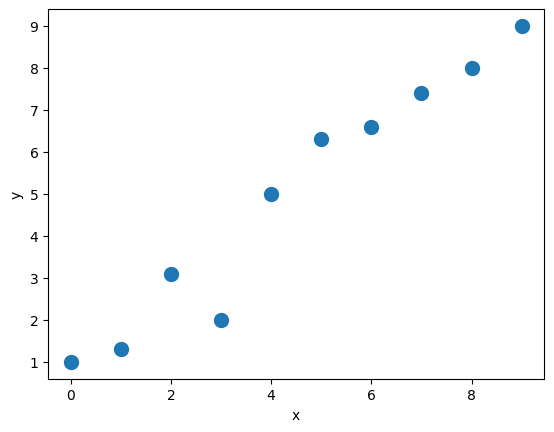

In [ ]:
X_train = np.arange(10, dtype='float32').reshape((10, 1)) #reshape para tener filas muestras y columnas numero de variables predictoras
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6,
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('figures/12_07.pdf')
plt.show()

Lo pasamos a tensores y normalizamos, podríamos meterlo mas adelante en un transform en TensorDataset!

In [ ]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

# On some computers the explicit cast to .float() is
# necessary
y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

In [ ]:
#definimos algunos hiperparametros necesarios para el modelo
learning_rate=0.001
num_epochs=200
log_epochs=10

#definimos la f.perdida, EL REDUCCTION MEAN es para cque calcule el MSE de cada muestra del lote y devyuelva el MSE medio.
loss_fn = nn.MSELoss(reduction="mean")
input_size=1 #variables predictoras
output_size=1 #variable objetivo
#definimos el modelo
model = nn.Linear(input_size,output_size)

#definimos el optimizador a usar
optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)

In [ ]:
for epoch in range(num_epochs+1):
  for x_batch,y_batch in train_dl:
    #predicciones
    pred=model(x_batch)
    #calcular perdidas
    loss=loss_fn(pred,y_batch)
    # calcular gradientes
    loss.backward()
    #update parametros
    optimizer.step()
    #resetear gradientes a cero
    optimizer.zero_grad()
  if epoch % log_epochs == 0:
    print(f'Epoch: {epoch} Loss: {loss.item():.4f}')

Epoch: 0 Loss: 42.6610
Epoch: 10 Loss: 28.9947
Epoch: 20 Loss: 2.7497
Epoch: 30 Loss: 10.5046
Epoch: 40 Loss: 11.5391
Epoch: 50 Loss: 8.6214
Epoch: 60 Loss: 0.9754
Epoch: 70 Loss: 2.9958
Epoch: 80 Loss: 2.2127
Epoch: 90 Loss: 1.3418
Epoch: 100 Loss: 0.8272
Epoch: 110 Loss: 1.1690
Epoch: 120 Loss: 0.6739
Epoch: 130 Loss: 1.5358
Epoch: 140 Loss: 0.0372
Epoch: 150 Loss: 0.2804
Epoch: 160 Loss: 0.1362
Epoch: 170 Loss: 0.1817
Epoch: 180 Loss: 0.4069
Epoch: 190 Loss: 0.0008
Epoch: 200 Loss: 0.0037


In [ ]:
print("Pesos Finales:" , model.weight.item())
print("Sesgos Finales:" , model.bias.item())

Pesos Finales: 2.672527313232422
Sesgos Finales: 4.87338399887085


Vamos ahora a crear un perceptron multicapas para clasificar las flores del conjunto de datos iris.

1. Descargamos los datos

In [ ]:
iris = load_iris()
X = iris["data"]
y = iris["target"]
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True,stratify=y,test_size=0.25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 4)
(112,)
(38, 4)
(38,)


2. Creamos el DataLoader para los datos de entrenamiento. Primero aplicamos preprocesado, luego convertimos a tensor, creamos el Dataset y por ultimo el dataloader para tener los batch

In [ ]:
escalado = StandardScaler()
X_train=escalado.fit_transform(X_train)
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train)
print(X_train.shape)
print(y_train.shape)


torch.Size([112, 4])
torch.Size([112])


In [ ]:
train_dataset = TensorDataset(X_train,y_train)
train_dl = DataLoader(train_dataset,batch_size=16,shuffle=True)

3. Creamos el modelo. Perceptron multicapa con una sola capa oculta

In [ ]:
class Model(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super().__init__()
    self.layer1 = nn.Linear(input_size,hidden_size)
    self.layer2 = nn.Linear(hidden_size,output_size)
  def forward(self,x):
    x = self.layer1(x)
    x = nn.Sigmoid()(x)
    x = self.layer2(x)
    x = nn.Softmax(dim=1)(x)
    return x

model = Model(4,16,3)

In [ ]:
learning_rate=0.001
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr = learning_rate)

num_epochs=100
loss_hist=[0] * (num_epochs+1)
accuracy_hist=[0] * (num_epochs+1)
for epoch in range(num_epochs+1):
  for x_batch,y_batch in train_dl:
    #predicciones
    pred=model(x_batch)
    #funcion perdida
    loss=loss_fn(pred,y_batch.long())
    #calcular gradientes
    loss.backward()
    #optimizar pesos
    optimizer.step()
    #resetear gradientes a cero
    optimizer.zero_grad()
    #añadir registro de métricas a cada época.
    loss_hist[epoch] += loss.item()*y_batch.size(0)
    is_correct = (torch.argmax(pred,dim=1)==y_batch).float()
    accuracy_hist[epoch] += is_correct.sum()
  loss_hist[epoch] /= len(train_dl.dataset)
  accuracy_hist[epoch] /= len(train_dl.dataset)
  if epoch % 10 == 0:
    print(f'Epoch {epoch}  Loss: {loss_hist[epoch]} Accuracy: {accuracy_hist[epoch]}')

Epoch 0  Loss: 1.0996860265731812 Accuracy: 0.3303571343421936
Epoch 10  Loss: 1.0593227658952986 Accuracy: 0.6607142686843872
Epoch 20  Loss: 1.0083247338022505 Accuracy: 0.6696428656578064
Epoch 30  Loss: 0.9485004544258118 Accuracy: 0.6696428656578064
Epoch 40  Loss: 0.897736234324319 Accuracy: 0.6696428656578064
Epoch 50  Loss: 0.8624261617660522 Accuracy: 0.6785714030265808
Epoch 60  Loss: 0.8351466740880694 Accuracy: 0.7232142686843872
Epoch 70  Loss: 0.8118965710912432 Accuracy: 0.8214285969734192
Epoch 80  Loss: 0.7913251263754708 Accuracy: 0.8303571343421936
Epoch 90  Loss: 0.7733459983553205 Accuracy: 0.8660714030265808
Epoch 100  Loss: 0.757241564137595 Accuracy: 0.8839285969734192


4. Evaluamos el modelo

In [ ]:
X_test_norm = escalado.transform(X_test)
X_test_norm=torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test)
print(X_test_norm.shape)
print(y_test.shape)
pred_test=model(X_test_norm)
accuracy = ((torch.argmax(pred_test,dim=1)==y_test).float()).mean()
print("Accuracy test: ", accuracy)

torch.Size([38, 4])
torch.Size([38])
Accuracy test:  tensor(0.8947)


5. Guardado de modelo y recarga para nuevas predicciones.

In [ ]:
torch.save(model,'ModeloIris.pt')
model_recharge = torch.load('ModeloIris.pt')
model_recharge.eval()

Model(
  (layer1): Linear(in_features=4, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=3, bias=True)
)

In [ ]:
pred_test_recharge=model_recharge(X_test_norm)
accuracy_recharge = ((torch.argmax(pred_test_recharge,dim=1)==y_test).float()).mean()
print("Accuracy test: ", accuracy_recharge)

Accuracy test:  tensor(0.8947)


## Capítulo 13: Profundización

1. Entender y trabajar con los grafos de cálculo de Pytorch. La diferenciacion automatica

El parámetro requires_grad en PyTorch es fundamental para el cálculo automático de gradientes durante el proceso de entrenamiento de modelos de redes neuronales. Este parámetro indica si PyTorch debe rastrear las operaciones realizadas en un tensor para poder calcular los gradientes con respecto a este tensor.

Al establecer requires_grad=True(dentro de un tensor), se le indica a PyTorch que debe rastrear las operaciones realizadas en ese tensor durante el forward pass para poder calcular los gradientes durante el backward pass (propagación hacia atrás) al aplicar el algoritmo de backpropagation.

Los gradientes son esenciales para optimizar los modelos. Si requires_grad=False en los parámetros que se quieren optimizar, PyTorch no calculará ni almacenará los gradientes de esos parámetros, lo que hará que no se actualicen durante el entrenamiento.

Las capas predefinidas en PyTorch, como nn.Linear, nn.Conv2d, nn.BatchNorm2d, entre otras, por defecto inicializan sus parámetros con requires_grad=True. Esto significa que, por lo general, no es necesario establecer explícitamente requires_grad=True al definir estas capas, ya que este comportamiento viene incluido en su implementación.

Los parámetros (weights y bias) dentro de linear_layer estarán automáticamente configurados con requires_grad=True.

Sin embargo, si creas tus propias capas personalizadas o parámetros utilizando tensores de PyTorch directamente (fuera del contexto de nn.Module), deberás establecer explícitamente requires_grad=True si deseas que esos parámetros se incluyan en el cálculo automático de gradientes durante el entrenamiento.


Para calcular estos gradientes debemos llamar al metodo .backward de la funcion de perdida y asi los registrara en el tensor.grad para luego poder hacer el optimizer.step y habra que resetearlo en cadaa iteracion del lote hecha con optimizer.zero_grad


2. Elaborar modelos más complejos usando la clase Sequential de Pytorch.

nn.Module y nn.Sequential son dos herramientas fundamentales en PyTorch para la construcción y organización de modelos de redes neuronales, pero tienen diferencias en su estructura y forma de uso.

- **nn.Sequential**:
  - nn.Sequential es una clase que permite construir modelos secuenciales de manera más compacta y sencilla, especialmente cuando se trata de apilar capas en secuencia. Puede contener capas y operaciones y las ejecuta en orden de entrada a salida.
  - Es útil cuando se tiene una secuencia lineal de capas donde la salida de una capa es la entrada de la siguiente capa. No es tan flexible como nn.Module para arquitecturas más complejas o con bifurcaciones/concatenaciones.
  - Se utiliza cuando la red se puede expresar de manera secuencial, con capas conectadas una tras otra sin bifurcaciones.

- **nn.Module**:
  - nn.Module es una clase base en PyTorch para la construcción de modelos personalizados. Es una forma más flexible de definir modelos ya que te permite crear arquitecturas de redes neuronales personalizadas, definiendo explícitamente las operaciones en el método forward().
  - Al heredar de nn.Module, se pueden definir capas, funciones, y métodos personalizados dentro de la clase. Los parámetros (pesos y sesgos) se pueden crear como atributos de la clase, lo que permite un mayor control sobre la arquitectura de la red.
  - Ofrece una forma más detallada y flexible para definir modelos, permitiendo la reutilización de capas y una estructura más compleja.



Ejemplo modelo secuencial:

In [ ]:
model = nn.Sequential(
    nn.Linear(10,32),
    nn.ReLU(),
    nn.Linear(32,1),
    nn.Sigmoid()
)
model

#si quisiera inicializar los pesos de la primera capa del modelo secuencia
nn.init.xavier_uniform_(model[0].weight)

# Imprimir la estructura del modelo
print(model)

Sequential(
  (0): Linear(in_features=10, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=1, bias=True)
  (3): Sigmoid()
)


Mismo modelo con nn.Module

In [ ]:
class Model(nn.Module):
  def __init__(self):
    super().__init__()
    self.densa1 = nn.Linear(10,32)
    self.relu = nn.ReLU()
    self.densa2 = nn.Linear(32,1)
    self.salida = nn.Sigmoid()
    # si quisiera Inicializar los pesos de la primera capa con Xavier
    nn.init.xavier_uniform_(self.densa1.weight)
  def forward(self,x):
    x = self.densa1(x)
    x = self.relu(x)
    x = self.densa2(x)
    x = self.salida(x)
    return x

model = Model()
model.eval()

Model(
  (densa1): Linear(in_features=10, out_features=32, bias=True)
  (relu): ReLU()
  (densa2): Linear(in_features=32, out_features=1, bias=True)
  (salida): Sigmoid()
)

Crear capa personaliza: Debe especificarse como un clase cn padre nn.Module tambiém, pero esto ahora mismo no me interesa, por lo que no vamos a prestar atención a ello: **Página 459 - 464**